In [100]:
# RECURRENT NEURAL NETWORKS FOR TIME SERIES FORECASTING AND STOCK MARK PREDICTION

In [101]:
# 1. Generation of time series

In [102]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [103]:
# generate time series data

def generate_time_series(sample_size, n_steps):
     freq1, freq2, offsets1, offsets2 = np.random.rand(4, sample_size, 1)
     time = np.linspace(0, 1, n_steps)
     series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10)) #wave1+
     series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) #wave2+
     series += 0.1 * (np.random.rand(sample_size, n_steps) - 0.5)  #noise
     return series[..., np.newaxis].astype(np.float32)

In [104]:
sample_size=10000
n_steps=51

In [105]:
df=generate_time_series(sample_size,n_steps)

In [106]:
x=df[:,:n_steps-1]
y=df[:,-1]

In [107]:
# split the dataset

x_train,x_temp,y_train,y_temp=train_test_split(x,y,test_size=0.3,random_state=42)
x_val,x_test,y_val,y_test=train_test_split(x_temp,y_temp, test_size=0.33,random_state=42)

In [108]:
# design, train and test models

def evaluate_model(model,x_test,y_test):
    loss=model.evaluate(x_test,y_test)
    print(f"Test Loss: {loss:.4f}")

In [109]:
# a.Fully connected neural network

fc_model = keras.Sequential([
    keras.layers.Flatten(input_shape=[n_steps-1, 1]),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1)
])

In [110]:
fc_model.compile(loss='mse', optimizer='adam')
fc_model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))
evaluate_model(fc_model, x_test, y_test)

Epoch 1/10
219/219 [==============================] - 1s 3ms/step - loss: 0.0152 - val_loss: 0.0056
Epoch 2/10
219/219 [==============================] - 0s 2ms/step - loss: 0.0048 - val_loss: 0.0045
Epoch 3/10
219/219 [==============================] - 0s 2ms/step - loss: 0.0038 - val_loss: 0.0042
Epoch 4/10
219/219 [==============================] - 0s 1ms/step - loss: 0.0035 - val_loss: 0.0036
Epoch 5/10
219/219 [==============================] - 0s 1ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 6/10
219/219 [==============================] - 0s 1ms/step - loss: 0.0031 - val_loss: 0.0035
Epoch 7/10
219/219 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0032
Epoch 8/10
219/219 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0028
Epoch 9/10
219/219 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0037
Epoch 10/10
31/31 [==============================] - 0s 1ms/step - loss: 0.0030
Test Loss: 0.0030


In [111]:
# b.Simple RNN with one layer (output layer)

rnn1_model = keras.Sequential([
    keras.layers.SimpleRNN(128, input_shape=[n_steps-1, 1]),
    keras.layers.Dense(1)
])

In [112]:
rnn1_model.compile(loss='mse', optimizer='adam')
rnn1_model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))
evaluate_model(rnn1_model, x_test, y_test)

Epoch 1/10
219/219 [==============================] - 5s 19ms/step - loss: 0.0127 - val_loss: 0.0038
Epoch 2/10
219/219 [==============================] - 4s 18ms/step - loss: 0.0038 - val_loss: 0.0032
Epoch 3/10
219/219 [==============================] - 4s 18ms/step - loss: 0.0034 - val_loss: 0.0027
Epoch 4/10
219/219 [==============================] - 4s 18ms/step - loss: 0.0029 - val_loss: 0.0026
Epoch 5/10
219/219 [==============================] - 4s 19ms/step - loss: 0.0030 - val_loss: 0.0026
Epoch 6/10
219/219 [==============================] - 4s 18ms/step - loss: 0.0030 - val_loss: 0.0026
Epoch 7/10
219/219 [==============================] - 4s 18ms/step - loss: 0.0029 - val_loss: 0.0031
Epoch 8/10
219/219 [==============================] - 4s 19ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 9/10
219/219 [==============================] - 4s 19ms/step - loss: 0.0030 - val_loss: 0.0031
Epoch 10/10
31/31 [==============================] - 0s 6ms/step - loss: 0.0030
Test Loss: 

In [113]:
# c. Simple RNN with two hidden layers and one output layer

rnn3_model = keras.Sequential([
    keras.layers.SimpleRNN(128, return_sequences=True, input_shape=[n_steps-1, 1]),
    keras.layers.SimpleRNN(128, return_sequences=True),
    keras.layers.SimpleRNN(128),
    keras.layers.Dense(1)
])

In [114]:
rnn3_model.compile(loss='mse', optimizer='adam')
rnn3_model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))
evaluate_model(rnn3_model, x_test, y_test)

Epoch 1/10
219/219 [==============================] - 18s 74ms/step - loss: 0.0389 - val_loss: 0.0047
Epoch 2/10
219/219 [==============================] - 16s 75ms/step - loss: 0.0054 - val_loss: 0.0051
Epoch 3/10
219/219 [==============================] - 16s 74ms/step - loss: 0.0051 - val_loss: 0.0050
Epoch 4/10
219/219 [==============================] - 16s 75ms/step - loss: 0.0040 - val_loss: 0.0029
Epoch 5/10
219/219 [==============================] - 16s 74ms/step - loss: 0.0046 - val_loss: 0.0063
Epoch 6/10
219/219 [==============================] - 16s 75ms/step - loss: 0.0043 - val_loss: 0.0041
Epoch 7/10
219/219 [==============================] - 17s 75ms/step - loss: 0.0037 - val_loss: 0.0055
Epoch 8/10
219/219 [==============================] - 16s 73ms/step - loss: 0.0038 - val_loss: 0.0032
Epoch 9/10
219/219 [==============================] - 16s 73ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 10/10
31/31 [==============================] - 1s 23ms/step - loss: 0.0032
T

In [115]:
# 2. Google stock prediction

In [116]:
# import necessary libraries

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
import matplotlib.pyplot as plt

In [117]:
# Load and preprocess the dataset

df=pd.read_csv('GOOGL.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...,...
4426,2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
4427,2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
4428,2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
4429,2022-03-23,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700


In [118]:
# Select relevant columns
df = df[['Date', 'Close']]

In [119]:
# Convert date column to datetime
df['Date']=pd.to_datetime(df['Date'])

# Set 'Date' as index using .set_index
df.set_index('Date', inplace=True)

/var/folders/23/3hzywj3d0l9_bzmps16p3jn40000gn/T/ipykernel_71278/2904682033.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']=pd.to_datetime(df['Date'])


In [120]:
# Normalize the data

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)

In [121]:
# Create empty lists to store sequences and targets
x = []
y = []

sequence_length = 10  # Adjust as needed
for i in range(len(data_scaled) - sequence_length):
    x.append(data_scaled[i:i+sequence_length])
    y.append(data_scaled[i+sequence_length])

# Convert lists to numpy arrays
x = np.array(x)
y = np.array(y)


In [122]:
# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

In [123]:
model = Sequential([
    SimpleRNN(units=50, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    SimpleRNN(units=50, activation='relu', return_sequences=True),
    Dropout(0.2),
    SimpleRNN(units=50, activation='relu', return_sequences=True),
    Dropout(0.2),
    SimpleRNN(units=50, activation='relu'),
    Dropout(0.2),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
111/111 [==============================] - 4s 13ms/step - loss: 0.0015
Epoch 2/50
111/111 [==============================] - 1s 12ms/step - loss: 7.6628e-04
Epoch 3/50
111/111 [==============================] - 1s 12ms/step - loss: 5.6092e-04
Epoch 4/50
111/111 [==============================] - 1s 13ms/step - loss: 4.7731e-04
Epoch 5/50
111/111 [==============================] - 1s 12ms/step - loss: 3.8591e-04
Epoch 6/50
111/111 [==============================] - 1s 11ms/step - loss: 3.2862e-04
Epoch 7/50
111/111 [==============================] - 2s 14ms/step - loss: 3.1198e-04
Epoch 8/50
111/111 [==============================] - 1s 12ms/step - loss: 3.3284e-04
Epoch 9/50
111/111 [==============================] - 1s 12ms/step - loss: 2.9746e-04
Epoch 10/50
111/111 [==============================] - 2s 14ms/step - loss: 3.8033e-04
Epoch 11/50
111/111 [==============================] - 1s 12ms/step - loss: 2.9669e-04
Epoch 12/50
111/111 [==============================] - 1

In [124]:
# Make predictions
predictions = model.predict(x_test)

# Calculate MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = calculate_mape(y_test, predictions)

# Calculate MSE
mse = np.mean(np.square(y_test - predictions))

print(f"MAPE: {mape:.2f}%")
print(f"MSE: {mse:.2f}")


28/28 [==============================] - 1s 3ms/step
MAPE: 16.81%
MSE: 0.01


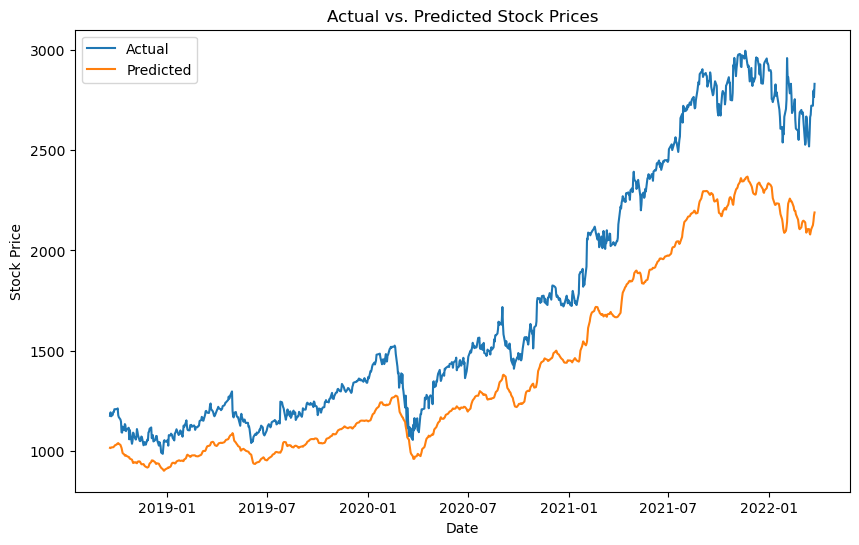

In [125]:
# Inverse transform predictions and actual values
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df.index[-len(y_test):], y_test, label='Actual')
plt.plot(df.index[-len(y_test):], predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs. Predicted Stock Prices')
plt.legend()
plt.show()
